In [1]:
import sys
sys.path.append("..")
import extract
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
house = extract.medsl_house()

In [3]:
house.shape

(787776, 25)

In [4]:
house.head()

,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,candidate,district,magnitude,dataverse,year,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
0,1ST BAPTIST CH SATSUMA,US HOUSE,NaN,NaN,TOTAL,2,MOBILE,01097,MOBILE,01097,OVERVOTES,001,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,01,63,41,2020-11-03,False
1,1ST BAPTIST CH SATSUMA,US HOUSE,NaN,NaN,TOTAL,40,MOBILE,01097,MOBILE,01097,UNDERVOTES,001,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,01,63,41,2020-11-03,False
2,1ST BAPTIST CH SATSUMA,US HOUSE,NaN,NaN,TOTAL,6,MOBILE,01097,MOBILE,01097,WRITEIN,001,1,HOUSE,2020,GEN,ALABAMA,False,True,AL,01,63,41,2020-11-03,False
3,1ST BAPTIST CH SATSUMA,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,482,MOBILE,01097,MOBILE,01097,JAMES AVERHART,001,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,01,63,41,2020-11-03,False
4,1ST BAPTIST CH SATSUMA,US HOUSE,REPUBLICAN,REPUBLICAN,TOTAL,3190,MOBILE,01097,MOBILE,01097,JERRY CARL,001,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,01,63,41,2020-11-03,False


In [5]:
house.columns

Index(['precinct', 'office', 'party_detailed', 'party_simplified', 'mode',
       'votes', 'county_name', 'county_fips', 'jurisdiction_name',
       'jurisdiction_fips', 'candidate', 'district', 'magnitude', 'dataverse',
       'year', 'stage', 'state', 'special', 'writein', 'state_po',
       'state_fips', 'state_cen', 'state_ic', 'date', 'readme_check'],
      dtype='object')

In [6]:
# string - The field which contains the name of the elected position for the race.
house.office.value_counts()

US HOUSE                                         786480
DELEGATE TO THE U.S. HOUSE OF REPRESENTATIVES      1296
Name: office, dtype: int64

In [7]:
# string - The party name for the given entry. Propositions, amendments, and other referenda are left as blank "".
house.party_detailed.value_counts(dropna=False)

DEMOCRAT                        243198
REPUBLICAN                      235142
NaN                             129542
LIBERTARIAN                      56968
INDEPENDENT                      20985
CONSERVATIVE                     19850
WORKING FAMILIES                 18199
GREEN                            12570
INDEPENDENCE                     11301
SERVE AMERICA MOVEMENT            7332
CONSTITUTION                      6289
DEMOCRATIC FARMER LABOR           4110
UTAH UNITED                       3636
UNITY OF COLORADO                 3205
GRASSROOTS LEGALIZE CANNABIS      3053
WORKING CLASS PARTY               1875
NONPARTISAN                       1875
LEGAL MARIJUANA NOW               1856
OTHER                             1215
US TAXPAYERS PARTY                 813
EDUCATION COMMUNITY LAW            631
CONSTITUTION PARTY                 480
SAVE OUR CITY                      458
APPROVAL VOTING                    433
DEMOCRATIC-NPL                     422
PACIFIC GREEN            

In [8]:
# string - The party name for the given entry simplified to one of the following: DEMOCRAT, REPUBLICAN, LIBERTARIAN, OTHER, and NONPARTISAN. Propositions, amendments, and other referenda are left as blank "".
house.party_simplified.value_counts(dropna=False)

DEMOCRAT       243198
REPUBLICAN     235142
NaN            129542
OTHER          121051
LIBERTARIAN     56968
NONPARTISAN      1875
Name: party_simplified, dtype: int64

In [9]:
# string - The voting mode for how the election results are reported. For results that do not offer disaggregation by mode, it will be "TOTAL". For other states that do offer the distinction, then some common entries might include: ABSENTEE, ELECTRONIC, ELECTION DAY, PROVISIONAL, ONE-STOP, etc.
house["mode"].value_counts(dropna=False)

TOTAL                   469553
ELECTION DAY            125254
ABSENTEE                 51844
PROVISIONAL              42461
EARLY                    36012
ABSENTEE BY MAIL         12948
EARLY VOTING              9586
MAIL                      9373
IN PERSON ABSENTEE        7867
ONE STOP                  7849
2ND ABSENTEE              7428
ADVANCED VOTING           5390
MAIL BALLOTS              1614
FAILSAFE                   200
FAILSAFE PROVISIONAL       200
HAND COUNTED               123
UOCAVA                      74
Name: mode, dtype: int64

<AxesSubplot:ylabel='Frequency'>

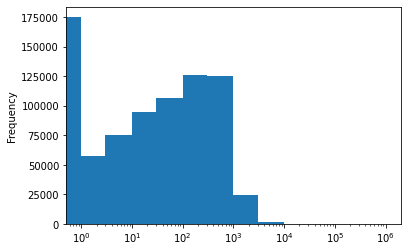

In [10]:
# int - The numeric value of votes for a given entry.
# Almost half of these values are zeros, which is higher than I'd expect
house.votes.plot(kind="hist", logx=True, bins=[0,1,3,10,30,100,300,1e3,3e3,1e4,3e4,1e5,3e5,1e6])

In [11]:
house[house.votes == 0].head()

,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,candidate,district,magnitude,dataverse,year,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
7,1ST BAPTIST WILMER GYM,US HOUSE,NaN,NaN,TOTAL,0,MOBILE,01097,MOBILE,01097,WRITEIN,001,1,HOUSE,2020,GEN,ALABAMA,False,True,AL,01,63,41,2020-11-03,False
20,ADULT ED_ BLDG_,US HOUSE,NaN,NaN,TOTAL,0,CLARKE,01025,CLARKE,01025,OVERVOTES,001,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,01,63,41,2020-11-03,False
21,ADULT ED_ BLDG_,US HOUSE,NaN,NaN,TOTAL,0,CLARKE,01025,CLARKE,01025,UNDERVOTES,001,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,01,63,41,2020-11-03,False
22,ADULT ED_ BLDG_,US HOUSE,NaN,NaN,TOTAL,0,CLARKE,01025,CLARKE,01025,WRITEIN,001,1,HOUSE,2020,GEN,ALABAMA,False,True,AL,01,63,41,2020-11-03,False
23,ADULT ED_ BLDG_,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,0,CLARKE,01025,CLARKE,01025,JAMES AVERHART,001,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,01,63,41,2020-11-03,False


In [12]:
# string - The candidate name.
# NOTE: Retention elections include the name of the candidate and the yes/no option
house.candidate.value_counts(dropna=False)

WRITEIN            54456
UNDERVOTES         31649
OVERVOTES          27405
DOUGLAS L TUMAN     5216
THOMAS R SUOZZI     4968
                   ...  
NEALE LUNDEKIRK        1
ALEX BEYOR             1
ALEX WAINE             1
TORREY BALLARD         1
JOSEPH A GRIFFO        1
Name: candidate, Length: 1516, dtype: int64

In [13]:
# string - The district identifier for the race, given that it is substate. If the district is a state legislative or U.S. House race, then the district is string padded to be 3 digits long and with zeroes, i.e. State Senate district 3 would be equal to "003". Other substate units (wards, seats, etc) with multiple level are included if given, i.e. State District Court of the Sixth district and seat C, would be "006, seat C". For candidates with state wide jurisdictions, district is "STATEWIDE". For races without district info, the field is left blank "".
house.district.value_counts(dropna=False)

002        89203
003        78622
004        77757
001        73096
005        48929
           ...  
RUT-5-1       11
RUT-5-3       11
RUT-5-4       11
FRA-2         11
WDR-4-2       10
Name: district, Length: 160, dtype: int64

In [14]:
house[house.district == "RUT-5-1"]

,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,candidate,district,magnitude,dataverse,year,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
745961,RUTLAND CITY,US HOUSE,NaN,NaN,TOTAL,4,RUTLAND,50021,RUTLAND CITY,5002161225,FIC,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,True,VT,50,13,06,2020-11-03,False
745962,RUTLAND CITY,US HOUSE,NaN,NaN,TOTAL,5,RUTLAND,50021,RUTLAND CITY,5002161225,OVERVOTES,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,False,VT,50,13,06,2020-11-03,False
745963,RUTLAND CITY,US HOUSE,NaN,NaN,TOTAL,112,RUTLAND,50021,RUTLAND CITY,5002161225,UNDERVOTES,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,False,VT,50,13,06,2020-11-03,False
745964,RUTLAND CITY,US HOUSE,NaN,NaN,TOTAL,0,RUTLAND,50021,RUTLAND CITY,5002161225,WRITEIN,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,True,VT,50,13,06,2020-11-03,False
745965,RUTLAND CITY,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,1469,RUTLAND,50021,RUTLAND CITY,5002161225,PETER WELCH,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,False,VT,50,13,06,2020-11-03,False
745966,RUTLAND CITY,US HOUSE,COMMUNIST,OTHER,TOTAL,12,RUTLAND,50021,RUTLAND CITY,5002161225,CHRISTOPHER HELALI,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,False,VT,50,13,06,2020-11-03,False
745967,RUTLAND CITY,US HOUSE,INDEPENDENT,OTHER,TOTAL,9,RUTLAND,50021,RUTLAND CITY,5002161225,JERRY TRUDELL,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,False,VT,50,13,06,2020-11-03,False
745968,RUTLAND CITY,US HOUSE,INDEPENDENT,OTHER,TOTAL,18,RUTLAND,50021,RUTLAND CITY,5002161225,MARCIA HORNE,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,False,VT,50,13,06,2020-11-03,False
745969,RUTLAND CITY,US HOUSE,INDEPENDENT,OTHER,TOTAL,194,RUTLAND,50021,RUTLAND CITY,5002161225,PETER R BECKER,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,False,VT,50,13,06,2020-11-03,False
745970,RUTLAND CITY,US HOUSE,INDEPENDENT,OTHER,TOTAL,11,RUTLAND,50021,RUTLAND CITY,5002161225,SHAWN ORR,RUT-5-1,1,HOUSE,2020,GEN,VERMONT,False,False,VT,50,13,06,2020-11-03,False


In [15]:
house.loc[~house.district.str.contains(r"\d{3}").astype(bool) & (house.district != "STATEWIDE"), "state"].value_counts()

VERMONT    3167
Name: state, dtype: int64

In [16]:
house.loc[house.state == "VERMONT",].shape

(3167, 25)

In [67]:
house.loc[house.state == "VERMONT", "district"].value_counts().head()

ESX-CAL-ORL    86
ESX-CAL        81
ORL-CAL        79
GI-CHI         67
ADD-2          63
Name: district, dtype: int64

In [57]:
districts = house[["state", "district"]].drop_duplicates()
district_count = districts.groupby("state")["district"].size().reset_index(name="size")
districts.merge(district_count, how="inner", on="state").query("size == 1")

,state,district,size
7,ALASKA,000,1
86,DELAWARE,000,1
87,DISTRICT OF COLUMBIA,NaN,1
223,MONTANA,000,1
288,NORTH DAKOTA,000,1
342,SOUTH DAKOTA,STATEWIDE,1
528,WYOMING,000,1


In [64]:
house.state.drop_duplicates()

0                      ALABAMA
11761                   ALASKA
12921                  ARIZONA
21855                 ARKANSAS
27629               CALIFORNIA
112149                COLORADO
126149             CONNECTICUT
132451                DELAWARE
135939    DISTRICT OF COLUMBIA
137235                 FLORIDA
165105                 GEORGIA
186665                  HAWAII
189785                   IDAHO
193681                ILLINOIS
235932                    IOWA
246892                  KANSAS
255409                KENTUCKY
258036               LOUISIANA
279557                   MAINE
281629                MARYLAND
318769           MASSACHUSETTS
328268                MICHIGAN
347862               MINNESOTA
365101             MISSISSIPPI
368635                MISSOURI
379975                 MONTANA
381301                NEBRASKA
385648                  NEVADA
392848           NEW HAMPSHIRE
394128              NEW JERSEY
395985              NEW MEXICO
400456                NEW YORK
546820  

In [17]:
# int - The number of candidates voted for in a given office-district race. The default is 1 (i.e. a single member winner take all district), with multimember districts having a magnitude matching the number of candidates who can win a race. This will be more common in house races and a select few states for their state house (i.e. NH).
house.magnitude.value_counts(dropna=False)

1    787776
Name: magnitude, dtype: int64

In [18]:
house.dataverse.value_counts()

HOUSE    787776
Name: dataverse, dtype: int64

In [19]:
house.year.value_counts()

2020    787776
Name: year, dtype: int64

In [20]:
house.stage.value_counts()

GEN    787776
Name: stage, dtype: int64

In [21]:
# string - An indicator for whether the election was a special election, "TRUE" if special, "FALSE" for non-special.
house.special.value_counts(dropna=False)

False    779901
True       7875
Name: special, dtype: int64

In [22]:
house.writein.value_counts(dropna=False)

False    723789
True      63987
Name: writein, dtype: int64

In [23]:
house.date.value_counts()

2020-11-03    787776
Name: date, dtype: int64

In [24]:
house.readme_check.value_counts()

False    746593
True      41183
Name: readme_check, dtype: int64